# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of
assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [1]:
 # Importing the basic libraries required for the project

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Sets the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# To build models for prediction import the Machine Learning models we require
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# Importing the other functions we may require from Scikit-Learn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

# To get diferent metric scores
import sklearn.metrics as metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

# Code to ignore warnings from function usage
import warnings;

warnings.filterwarnings('ignore')
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

## **Loading the dataset**

In [2]:
# Load the ExtraaLearn dataset file
from google.colab import drive
drive.mount('/content/drive')

Df = pd.read_csv("/content/drive/MyDrive/MIT/Classification and Hypothesis Testing/ExtraaLearn.csv")

Mounted at /content/drive


In [3]:
# Copying data to another variable to avoid any changes to original data
data = Df.copy()

## **Data Overview**

- Observations
- Sanity checks

### **We use the head() and tail() functions to read the first and last 5 rows of the dataset for better understanding.**

In [4]:
# Load the first 5 rows of the dataset

data.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.86100,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.32000,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.07400,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.05700,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.91400,Email Activity,No,No,No,No,No,0


In [5]:
# Load the last 5 rows of the dataset

data.tail()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.17000,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.39300,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.69200,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.87900,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.07500,Phone Activity,No,No,No,No,No,0


### **Understand the shape of the dataset**

In [6]:
# Returns the number of rows and columns

data.shape

(4612, 15)



*   The dataset has **4612 rows and 20 columns.**




### **Check the data types of the columns for the dataset**

In [7]:
# Returns a summary of the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f



*   We can see that the number of non-null values is the same as the total number of entries in the data, i.e., **there are no null values.**



### **Check the number of unique values in each column**

In [8]:
data.nunique()

ID                       4612
age                        46
current_occupation          3
first_interaction           2
profile_completed           3
website_visits             27
time_spent_on_website    1623
page_views_per_visit     2414
last_activity               3
print_media_type1           2
print_media_type2           2
digital_media               2
educational_channels        2
referral                    2
status                      2
dtype: int64

*  Most of the variables are categorical except - Age, Website visits, time spent on website, and pages views per visit.

*  We can drop the column - ID as it is unique for each participant and will not add value to the model.

In [9]:
# Dropping ID column
data.drop(columns='ID',inplace=True)

In [10]:
# Checking for duplicate values in the data
data.duplicated().sum()

14

**Observation:**
- Data contains 14 duplicated rows

In [11]:
# Identify duplicate rows
duplicates = data.duplicated()

# Print the duplicate rows
print(data[duplicates])

      age current_occupation first_interaction profile_completed  \
1097   59       Professional           Website              High   
1375   58       Professional           Website              High   
1592   56       Professional        Mobile App            Medium   
1675   56       Professional        Mobile App            Medium   
1679   32         Unemployed        Mobile App              High   
2789   59         Unemployed        Mobile App              High   
2980   58       Professional        Mobile App              High   
3013   58         Unemployed           Website              High   
3227   59         Unemployed           Website            Medium   
3278   57       Professional        Mobile App            Medium   
3441   57       Professional        Mobile App              High   
3611   21            Student           Website            Medium   
3625   60         Unemployed           Website              High   
4168   58       Professional        Mobile App  

In [12]:
# Remove duplicate rows
data.drop_duplicates(inplace=True)

In [13]:
# Checking for duplicate values in the data
data.duplicated().sum()

0

### **Check the summary statistics of the dataset and write your observations**

In [14]:
# Checking the descriptive statistics of the columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4598.00000,46.17921,13.16081,18.00000,36.00000,51.00000,57.00000,63.00000
website_visits,4598.00000,3.57764,2.82657,0.00000,2.00000,3.00000,5.00000,30.00000
time_spent_on_website,4598.00000,726.21575,743.88496,0.00000,155.25000,377.50000,1341.75000,2537.00000
page_views_per_visit,4598.00000,3.03534,1.96401,0.00000,2.08000,2.80900,3.75900,18.43400
status,4598.00000,0.29904,0.45789,0.00000,0.00000,0.00000,1.00000,1.00000


**Observations:**
- While the average age and median are 46 & 51 respectively, whe can also see the min and max being 18 & 63 respectively.
- The website visits range around a mean and median of 3 while the maximun visits are 30.
- We can see that the average time spent on the website is 726 and the median is 377 with rare scenarios like the maximum amount of time being 2537
- The differences in the page views per visit can be seen in the mean of 3, median of 2.8 and max of 18.4 pages.

### **Check the count of each unique category in each of the categorical variables.**

In [15]:
# List of all important categorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing the number of occurrences of each unique value in each categorical column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

Professional    2608
Unemployed      1436
Student          554
Name: current_occupation, dtype: int64
--------------------------------------------------
Website       2536
Mobile App    2062
Name: first_interaction, dtype: int64
--------------------------------------------------
High      2255
Medium    2236
Low        107
Name: profile_completed, dtype: int64
--------------------------------------------------
Email Activity      2269
Phone Activity      1229
Website Activity    1100
Name: last_activity, dtype: int64
--------------------------------------------------
No     4102
Yes     496
Name: print_media_type1, dtype: int64
--------------------------------------------------
No     4365
Yes     233
Name: print_media_type2, dtype: int64
--------------------------------------------------
No     4071
Yes     527
Name: digital_media, dtype: int64
--------------------------------------------------
No     3894
Yes     704
Name: educational_channels, dtype: int64
--------------------------

**Observations:**
- **The majority of users (2608) are profesional** while the rest are either unemployed or students.

- **The website gets the majority of users (2536)**, whereas mobile app sits at (2062).

- The majority of user have either a high profile or a medium profile completed, with rare ocurrences of a low completed profile.

- Email activity gets the majority of users recorded as last activity (2269)

- Just a small amount of users (93) have been refered to the site.

## Exploratory Data Analysis (EDA)



### **Univariate Analysis**

In [16]:
# Function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

#### **Observations on age**

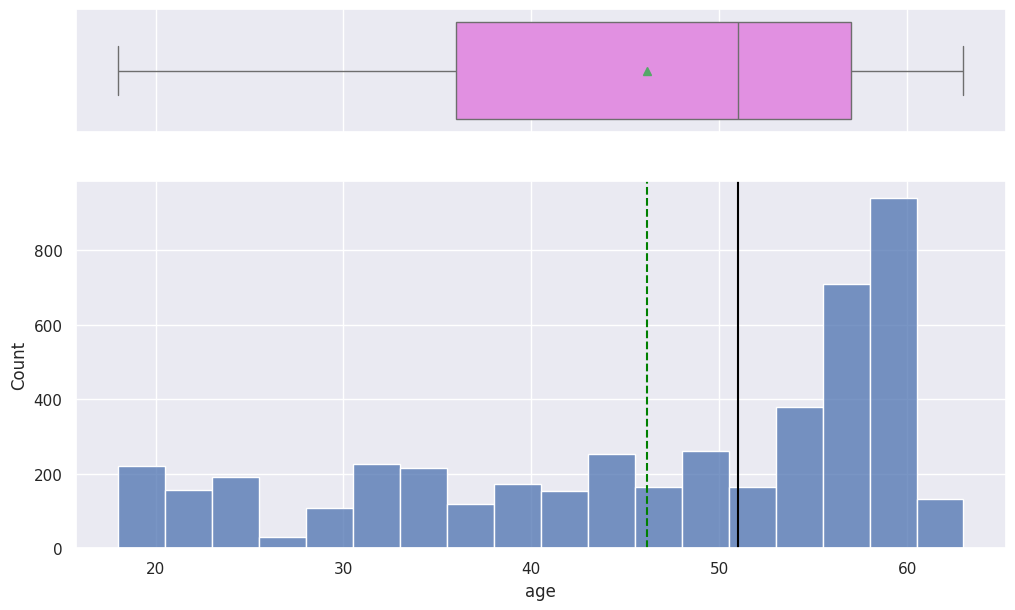

In [17]:
histogram_boxplot(data, "age")

**Observations:**
- We can observe how the age of majority of leads range above 50 years.

#### **Observations on website_visits**

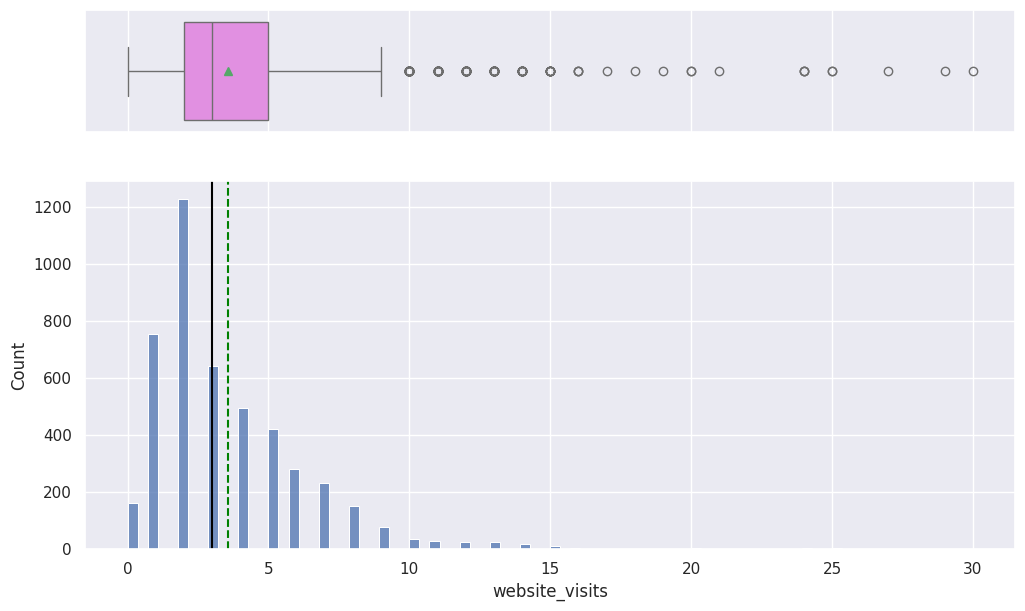

In [18]:
histogram_boxplot(data, "website_visits") # Code to plot a histogram_boxplot for website_visits

In [19]:
# To check how many leads have not visited web-site
data[data["website_visits"] == 0].shape

(160, 14)

**Observations:**
- We can observe that the majority of leads website visits range from 1 to 5 visits.
- We can also see that there are 160 leads that have not visited the website

#### **Observations on number of time_spent_on_website**

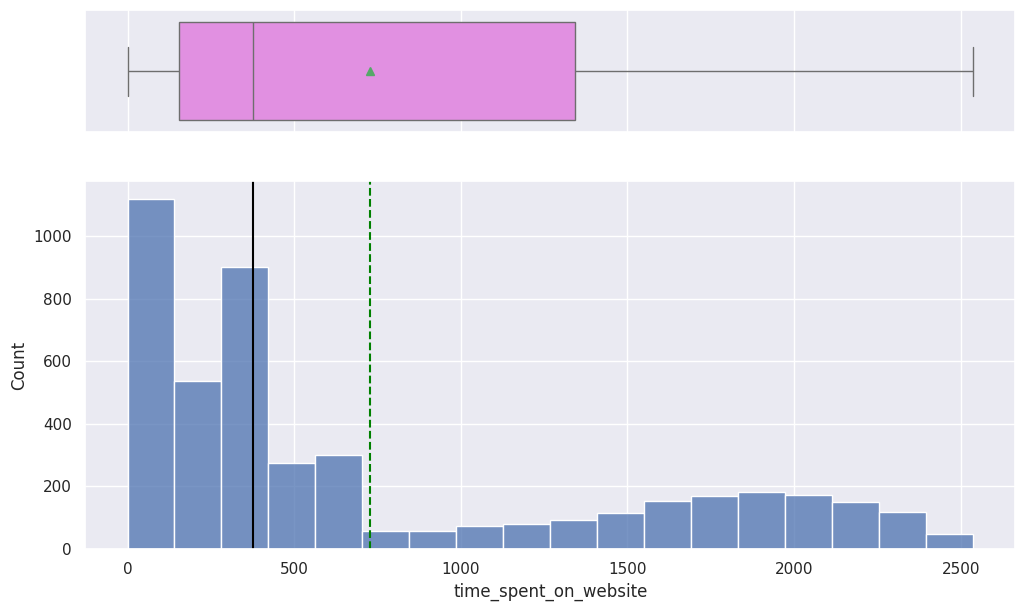

In [20]:
histogram_boxplot(data, "time_spent_on_website") #code to plot a histogram_boxplot for time_spent_on_website

**Observations:**
- We observe that the total time spent on the website spikes at lower than 500 with the majority of leads.

#### **Observations on number of page_views_per_visit**

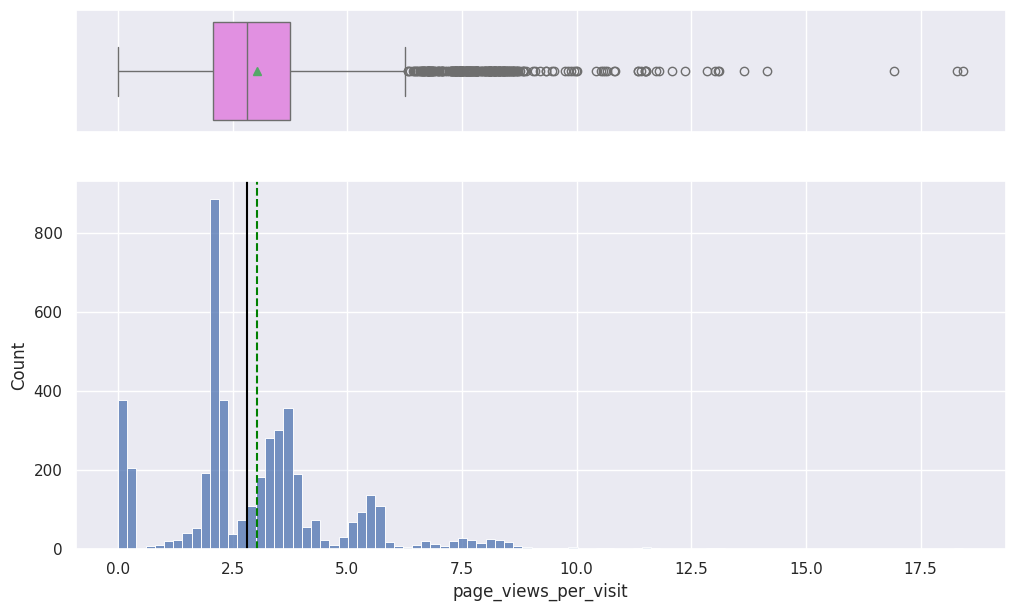

In [21]:
histogram_boxplot(data, "page_views_per_visit") # Code to plot a histogram_boxplot for page_views_per_visit

**Observations:**
- We can observe that the majority of leads have an average 2 - 4 pages viewed per each visit.

In [22]:
# function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### **Observations on current_occupation**

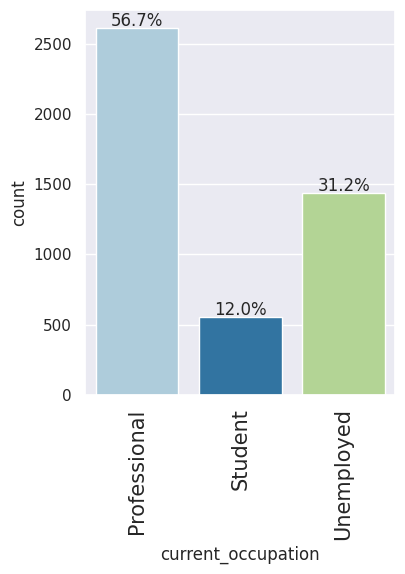

In [23]:
labeled_barplot(data, "current_occupation", perc=True)

**Observations:**
- It can be observed that the majority of the leads have the current occupation of professional while the minority are students.
- Based on that data we can infer that the majority of leads are professionals trying to improve their carrers while the rest are unemployed people trying to improve their chances of landing a job and students who may find the service useful for their classes.

#### **Observations on first_interaction**

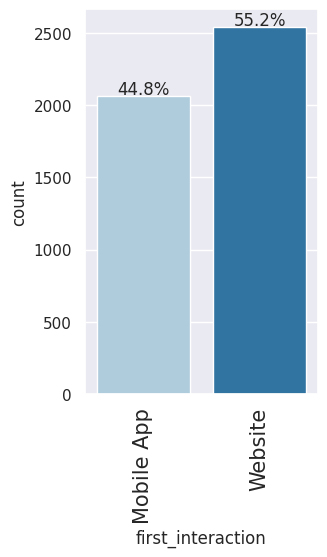

In [24]:
labeled_barplot(data, "first_interaction", perc=True)

**Observations:**
- When analyzing the first interactions data, we can see that the majority of leads have interacted through the website.

#### **Observation on last_activity**

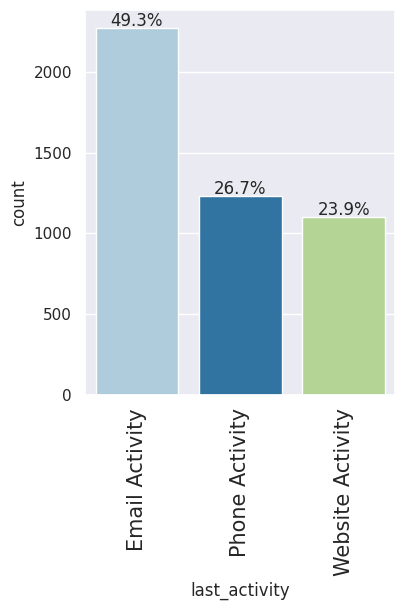

In [25]:
labeled_barplot(data, "last_activity", perc=True)

**Observations:**
- It can be observed that the last interaction of the majority of leads was through Email.

#### **Observations on print_media_type1**

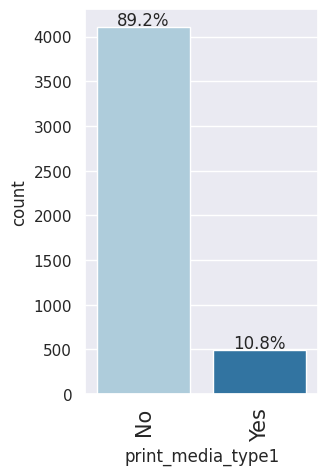

In [26]:
labeled_barplot(data, "print_media_type1", perc=True)

**Observations:**
- With a difference of (80%) the majority of leads had not seen the ad in the newspaper.

#### **Observations on print_media_type2**

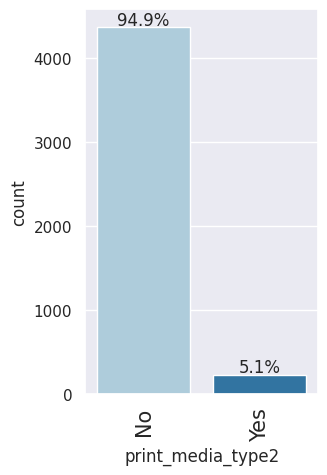

In [27]:
labeled_barplot(data, "print_media_type2", perc=True)

**Observations:**
- Similar to the print media type 1, there's a difference of (90%) between those who saw the ad in the magazine and those who did not (majority).

#### **Observations on digital_media**

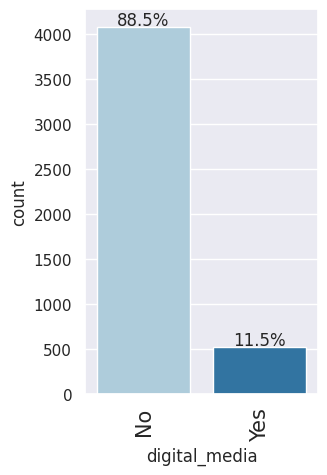

In [28]:
labeled_barplot(data, "digital_media", perc=True)

**Observations:**
- It can be seen that the majority of leads (88.5%) had not seen the ad on any any digital plataform.

#### **Observations on educational_channels**

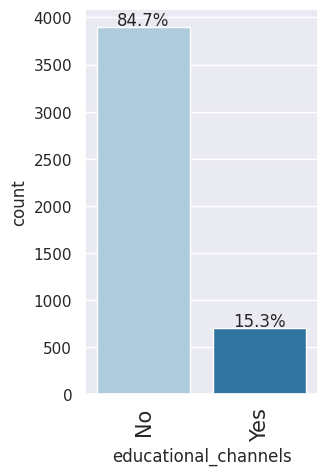

In [29]:
labeled_barplot(data, "educational_channels", perc=True)

**Observations:**
- The majority of the leads had not heard about the service through any educational channel.

#### **Observations on referral**

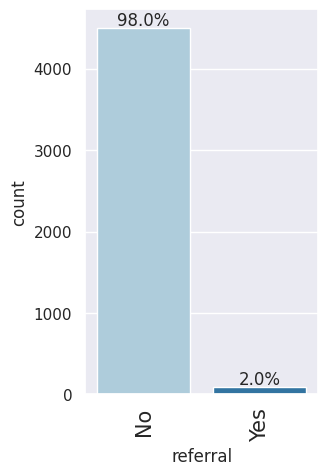

In [30]:
labeled_barplot(data, "referral", perc=True)

**Observations:**
- It can be observed that just 2% of the leads have been referred to the service.

#### **Observations on profile_completed**

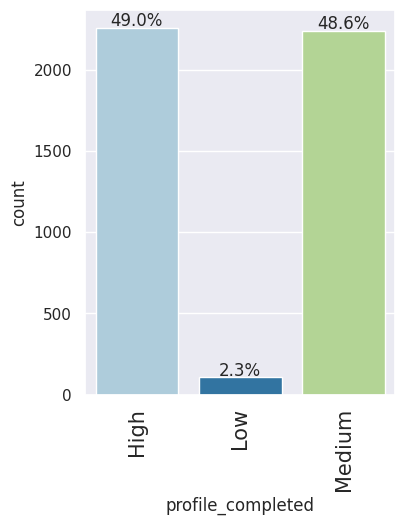

In [31]:
labeled_barplot(data, "profile_completed", perc=True)

**Observation:**
- We can observe that there's nearly the same amount of leads with a high percentage of their profile completed as there are medium profile completed leads.

#### **Obvservations on status**

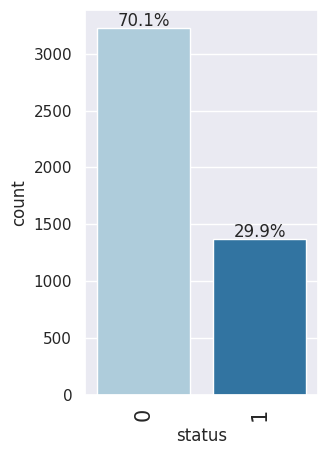

In [32]:
labeled_barplot(data, "status", perc=True)

**Observations:**
- We can see how the majority of the leads (70%) have not converted into a paid customer, leaving (30%) of the leads as paid customers.

### **Bivariate Analysis**

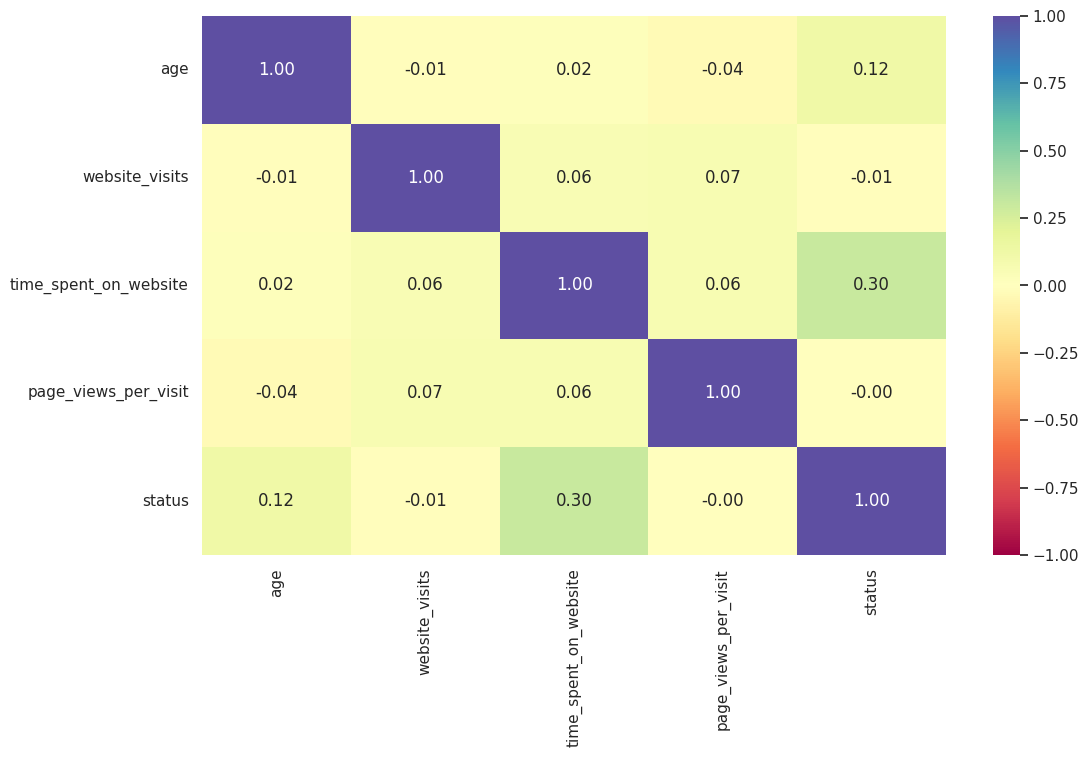

In [33]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**Functions for further analysis**

In [34]:
### function to plot distributions wrt target

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [35]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### **Question 1: Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.**

status                 0     1   All
current_occupation                  
All                 3223  1375  4598
Professional        1681   927  2608
Unemployed          1053   383  1436
Student              489    65   554
------------------------------------------------------------------------------------------------------------------------


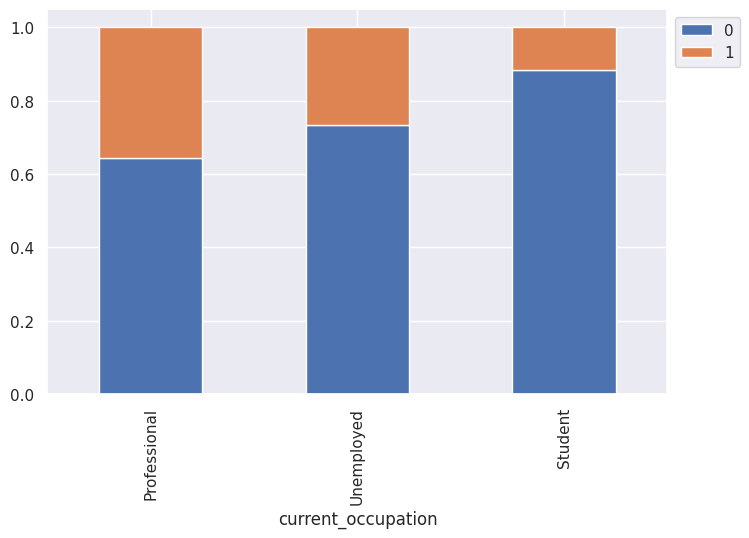

In [36]:
stacked_barplot(data, "current_occupation", "status") # Code to plot stacked_barplot for current_occupation and status

In [37]:
# Checking the median value

data.groupby(["current_occupation"])["status"].describe()

,count,mean,std,min,25%,50%,75%,max
current_occupation,,,,,,,,
Professional,2608.00000,0.35544,0.47874,0.00000,0.00000,0.00000,1.00000,1.00000
Student,554.00000,0.11733,0.32210,0.00000,0.00000,0.00000,0.00000,1.00000
Unemployed,1436.00000,0.26671,0.44240,0.00000,0.00000,0.00000,1.00000,1.00000


**Age can also be consider as a good factor to differentiate between leads**

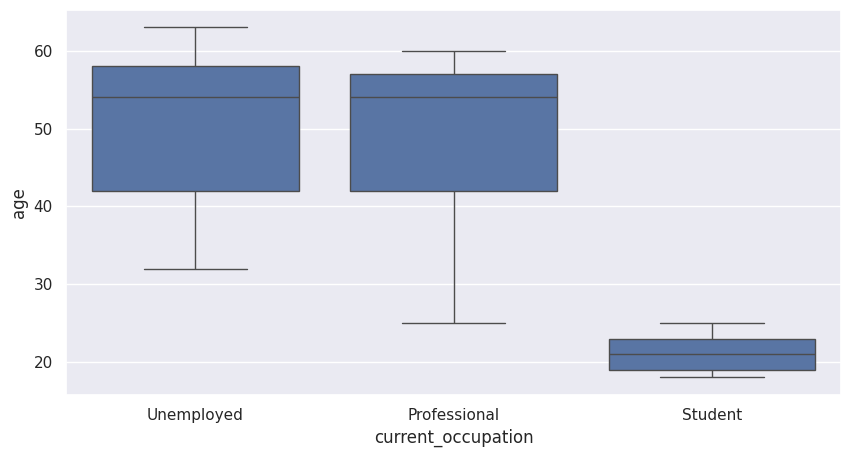

In [38]:
plt.figure(figsize=(10, 5))
sns.boxplot(data = data, x = data["current_occupation"], y = data["age"])
plt.show()

In [39]:
# Checking the median value

data.groupby(["current_occupation"])["age"].describe()

,count,mean,std,min,25%,50%,75%,max
current_occupation,,,,,,,,
Professional,2608.00000,49.32285,9.89574,25.00000,42.00000,54.00000,57.00000,60.00000
Student,554.00000,21.14440,2.00291,18.00000,19.00000,21.00000,23.00000,25.00000
Unemployed,1436.00000,50.12813,9.99444,32.00000,42.00000,54.00000,58.00000,63.00000


**Observations:**
- We can observe that when we analyze how the current occupation afect the leads status the majority of leads are either professionals or unemployed.
- The same situation can be seen when we use the age parameter in order to analyze the status.

#### **Question 2: The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?**

status                0     1   All
first_interaction                  
All                3223  1375  4598
Website            1379  1157  2536
Mobile App         1844   218  2062
------------------------------------------------------------------------------------------------------------------------


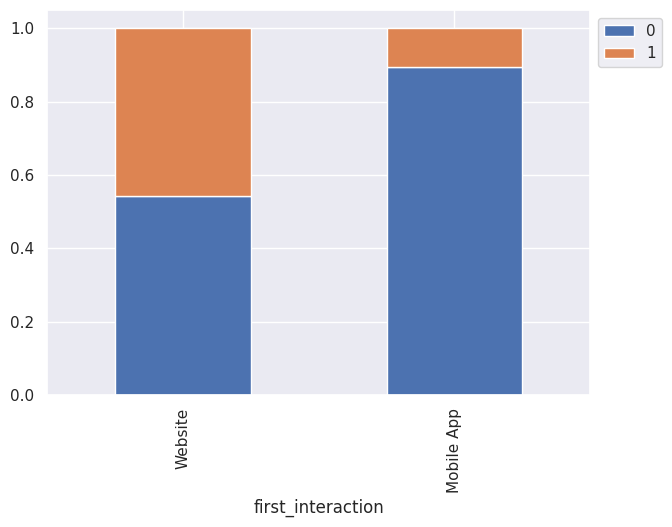

In [40]:
stacked_barplot(data, "first_interaction", "status") # Code to plot stacked_barplot for first_interaction and status

**Observations:**
- We can observe how the majority of the leads that have subscribed to the programs have had their first interaction through the website (1157) while the mobile app only managed to bring **218 leads of the 2062 that used it.**

In [41]:
# Checking the median value

data.groupby(["first_interaction"])["status"].describe()

,count,mean,std,min,25%,50%,75%,max
first_interaction,,,,,,,,
Mobile App,2062.00000,0.10572,0.30756,0.00000,0.00000,0.00000,0.00000,1.00000
Website,2536.00000,0.45623,0.49818,0.00000,0.00000,0.00000,1.00000,1.00000


#### **Question 3: The company uses multiple modes to interact with prospects. Which way of interaction works best?**

status               0     1   All
last_activity                     
All               3223  1375  4598
Email Activity    1579   690  2269
Website Activity   677   423  1100
Phone Activity     967   262  1229
------------------------------------------------------------------------------------------------------------------------


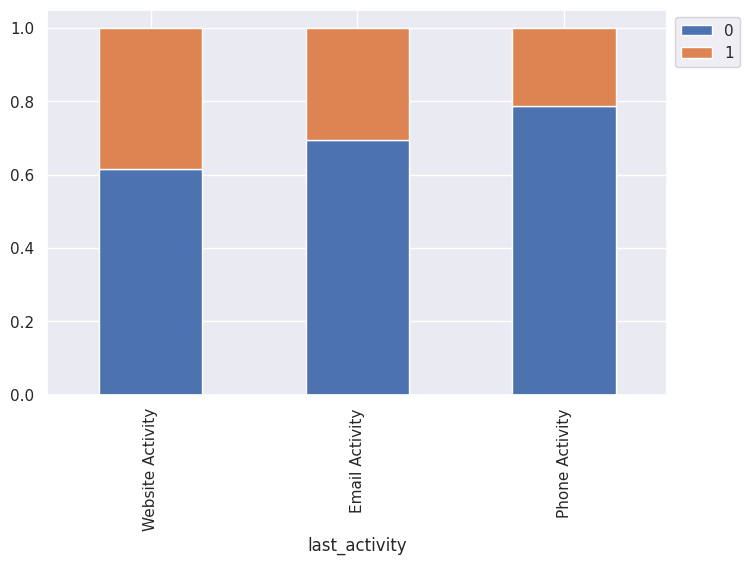

In [42]:
stacked_barplot(data, "last_activity", "status") # Code to plot stacked_barplot for last_activity and status

In [43]:
# Checking the median value

data.groupby(["last_activity"])["status"].describe()

,count,mean,std,min,25%,50%,75%,max
last_activity,,,,,,,,
Email Activity,2269.00000,0.30410,0.46013,0.00000,0.00000,0.00000,1.00000,1.00000
Phone Activity,1229.00000,0.21318,0.40972,0.00000,0.00000,0.00000,0.00000,1.00000
Website Activity,1100.00000,0.38455,0.48671,0.00000,0.00000,0.00000,1.00000,1.00000


**Observations:**
- It can be seen that while the difference in the amount of leads converted is not that large, the website interaction has been the most succesful at converting leads.

#### **Question 4: The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?**

status                0     1   All
print_media_type1                  
All                3223  1375  4598
No                 2886  1216  4102
Yes                 337   159   496
------------------------------------------------------------------------------------------------------------------------


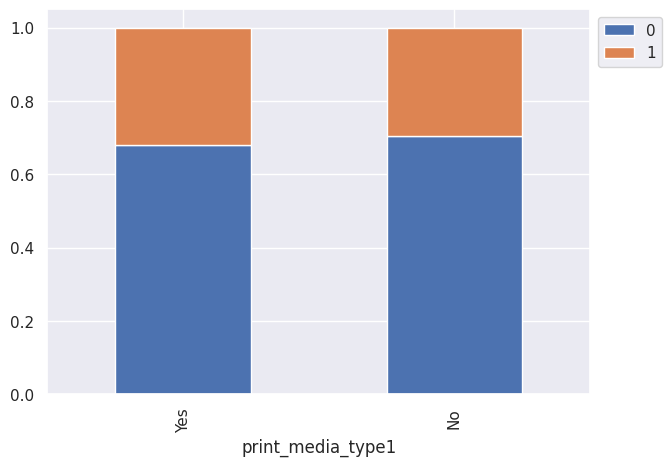

In [44]:
stacked_barplot(data, "print_media_type1", "status")

status                0     1   All
print_media_type2                  
All                3223  1375  4598
No                 3065  1300  4365
Yes                 158    75   233
------------------------------------------------------------------------------------------------------------------------


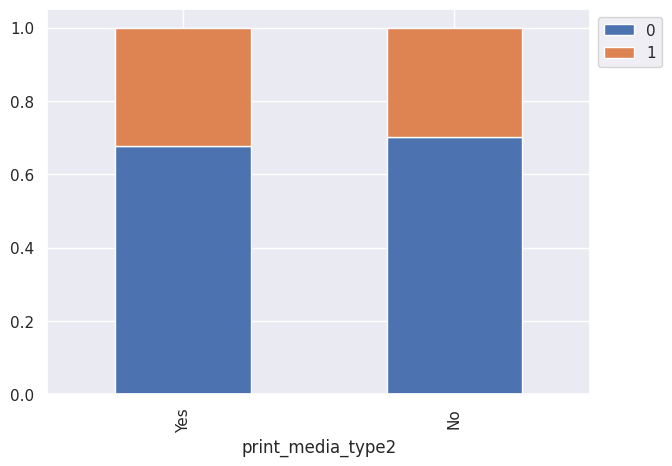

In [45]:
stacked_barplot(data, "print_media_type2", "status")

status            0     1   All
digital_media                  
All            3223  1375  4598
No             2864  1207  4071
Yes             359   168   527
------------------------------------------------------------------------------------------------------------------------


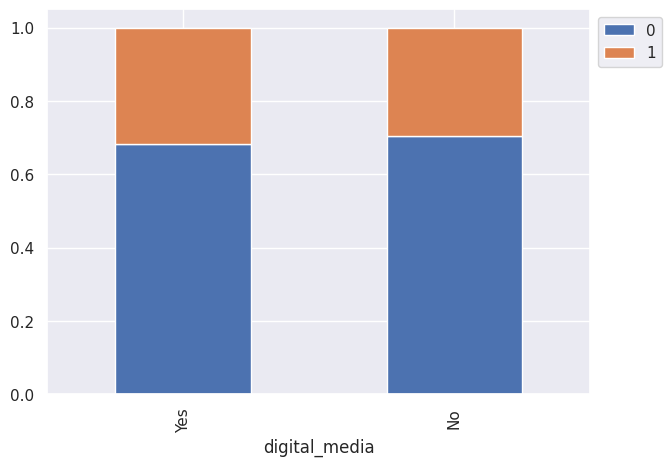

In [46]:
stacked_barplot(data, "digital_media", "status")

status                   0     1   All
educational_channels                  
All                   3223  1375  4598
No                    2716  1178  3894
Yes                    507   197   704
------------------------------------------------------------------------------------------------------------------------


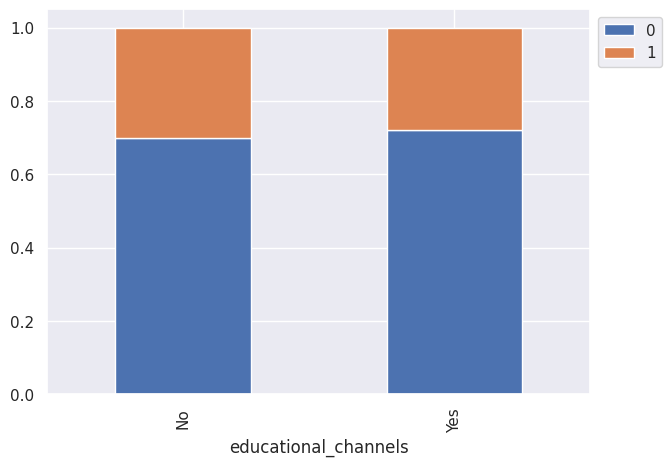

In [47]:
stacked_barplot(data, "educational_channels", "status")

status       0     1   All
referral                  
All       3223  1375  4598
No        3193  1312  4505
Yes         30    63    93
------------------------------------------------------------------------------------------------------------------------


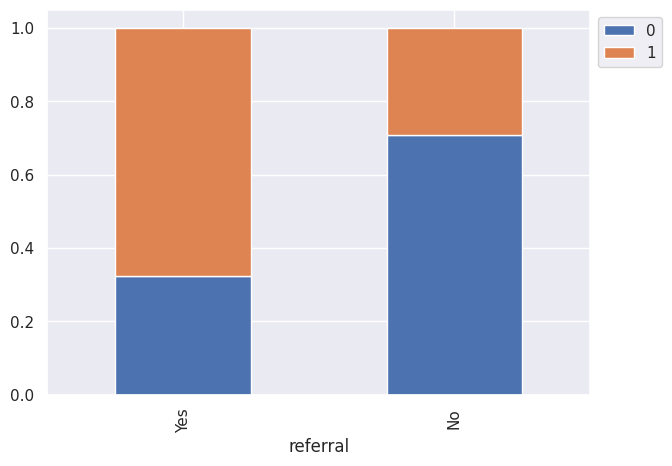

In [48]:
stacked_barplot(data, "referral", "status")

**Observations:**
- While it may have the smallest sample, the referral channel has the most converted leads (63 of 93).
- Other than that, we can see that the succes rate of the other channels is an average of a third of the leads that interacted with the channels.

#### **Question 5: People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?**

status                0     1   All
profile_completed                  
All                3223  1375  4598
High               1311   944  2255
Medium             1813   423  2236
Low                  99     8   107
------------------------------------------------------------------------------------------------------------------------


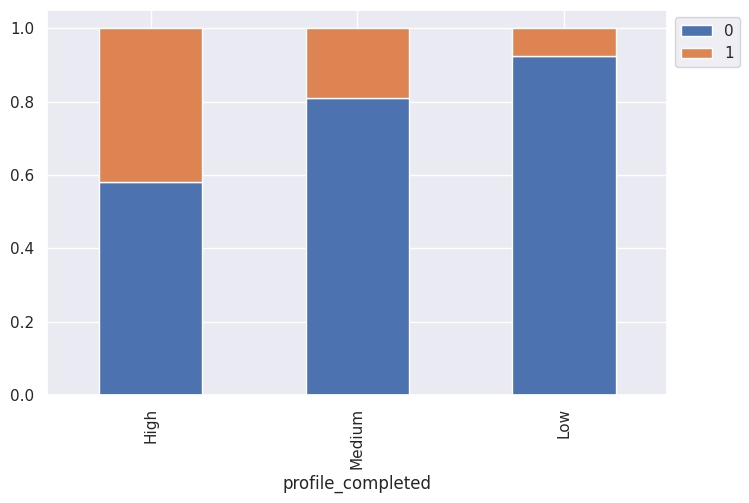

In [49]:
stacked_barplot(data, "profile_completed", "status")

**Observations:**
- We observe that the majority of the converted leads have completed their profile to a high percentage. Therefore we can infere that the higher the percentage the more additional information they can access making them more inclined to become paid customers.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### Outlier Check

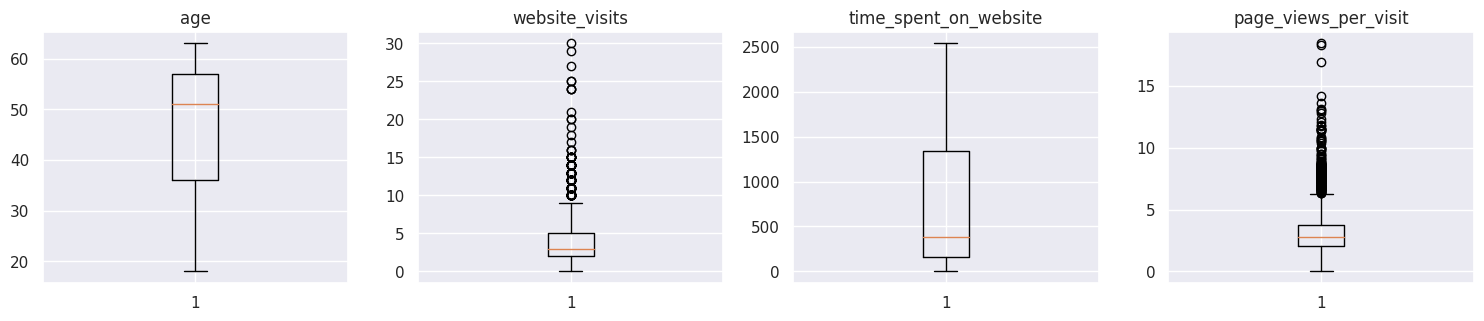

In [50]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
numeric_columns.remove("status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

## Data Preparation for modeling

- The objective is to predict which lead is more likely to be converted.

In [51]:
X = data.drop(["status"], axis=1)
Y = data["status"] # define the dependent (target) variable

X = pd.get_dummies(X, drop_first=True)

# Splitting the data in 70:30 ratio for train to test data
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [52]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3218, 16)
Shape of test set :  (1380, 16)
Percentage of classes in training set:
0   0.69702
1   0.30298
Name: status, dtype: float64
Percentage of classes in test set:
0   0.71014
1   0.28986
Name: status, dtype: float64


## **Model Evaluation Criterion:**

#### **The Model can make wrong predictions as:**
1. Predicting a lead will be converted to a paid customer when in reality the lead doesn't convert to one - Loss of resources
2. Predicting a lead will not be converted to a paid customer when in reality the lead does convert to one - Loss of opportunity

#### **Which case is more important?**
- Predicting that a lead won't be converted to a paid customer and the lead does convert i.e. losing on a potential source of income for the company because that lead will not be targeted by the marketing team when he should have been targeted.

#### **How to reduce the loss i.e need to reduce False Negatives?**
- The company would want the `Recall` to be maximized, the greater the Recall score the lesser the chances of producing false negatives.

## **Building Classification Models**

First, We create functions to calculate the different metrics and the confusion matrix so that there won't be any need of using the same code repeatedly for every model.

In [53]:
# Function to print the classification report and get confusion matrix in a proper format

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (8, 5))

    sns.heatmap(cm, annot = True,  fmt = '.2f', xticklabels = ['Not Converted', 'Converted'], yticklabels = ['Not Converted', 'Converted'])

    plt.ylabel('Actual')

    plt.xlabel('Predicted')

    plt.show()

## **Decision Tree**

### Building a Decision Tree model

In [54]:
# Fitting the decision tree classifier on the training data
d_tree = DecisionTreeClassifier(random_state=1)

d_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

#### Performance on train and test data

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2243
           1       1.00      1.00      1.00       975

    accuracy                           1.00      3218
   macro avg       1.00      1.00      1.00      3218
weighted avg       1.00      1.00      1.00      3218



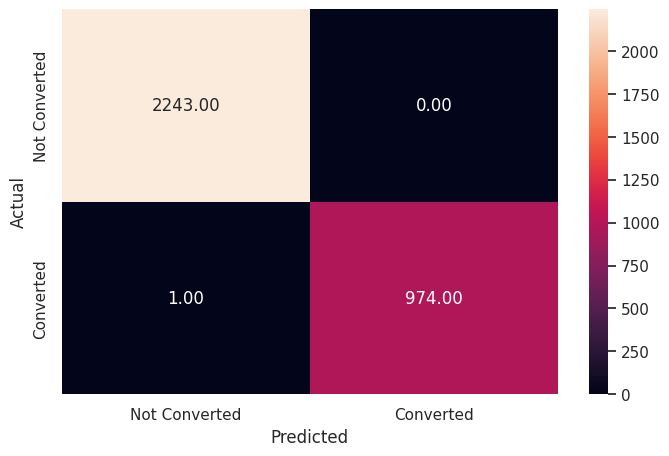

In [55]:
# Performance checking on training data
y_pred_train1 = d_tree.predict(X_train)

metrics_score(y_train, y_pred_train1)

**Observations:**
- 0 errors on the trainings set, which means that each sample has been classified correctly.

              precision    recall  f1-score   support

           0       0.85      0.84      0.85       980
           1       0.62      0.65      0.64       400

    accuracy                           0.78      1380
   macro avg       0.74      0.74      0.74      1380
weighted avg       0.79      0.78      0.79      1380



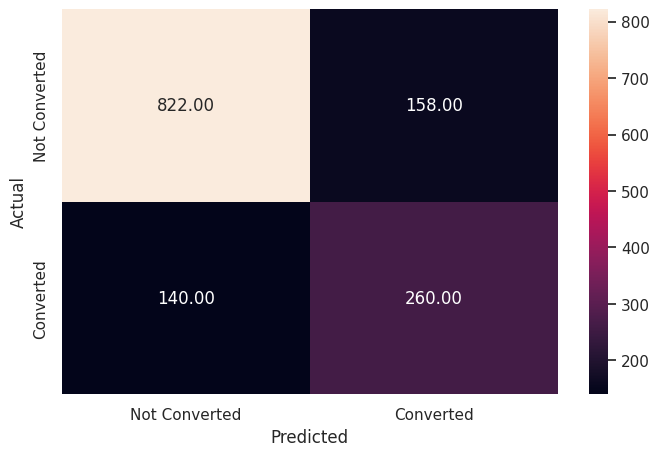

In [56]:
# Performance assesment on the testing data
y_pred_test1 = d_tree.predict(X_test)

metrics_score(y_test, y_pred_test1)

**Observations:**
- Since the decision tree model is clearly overfitting we will have to tune the decision tree to reduce the overfitting.

**Will make use of hyperparameter tuning using GridSearchCV in order to find the optimal max_depth** to reduce overfitting of the model. We can tune some other hyperparameters as well.

### **Decision Tree - Hyperparameter Tuning**

In [57]:
# Choose the type of classifier
d_tree_tuned = DecisionTreeClassifier(random_state = 7, class_weight = {0: 0.3, 1: 0.7})

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 10),
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
d_tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=3, min_samples_leaf=5, random_state=7)

We now have tuned the model and fitted the tuned model on the training data. Now, **let's check the model performance on the training and testing data.**

#### Check the model performance on train and test set

              precision    recall  f1-score   support

           0       0.95      0.74      0.83      2243
           1       0.61      0.91      0.73       975

    accuracy                           0.79      3218
   macro avg       0.78      0.83      0.78      3218
weighted avg       0.84      0.79      0.80      3218



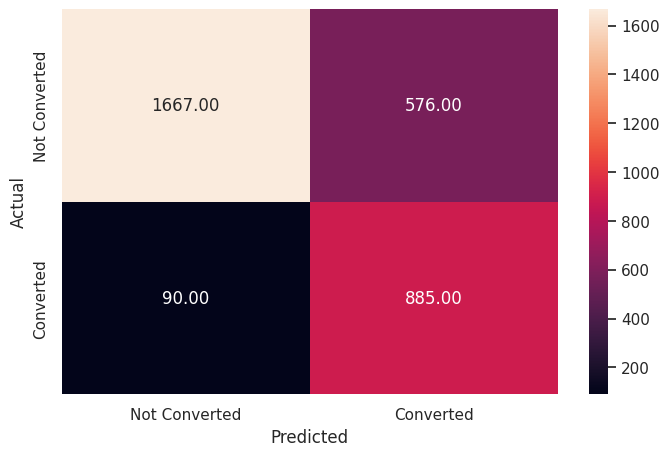

In [58]:
# Checking performance on the training dataset
y_pred_train2 = d_tree_tuned.predict(X_train)

metrics_score(y_train, y_pred_train2)

              precision    recall  f1-score   support

           0       0.94      0.73      0.82       980
           1       0.58      0.89      0.70       400

    accuracy                           0.78      1380
   macro avg       0.76      0.81      0.76      1380
weighted avg       0.83      0.78      0.79      1380



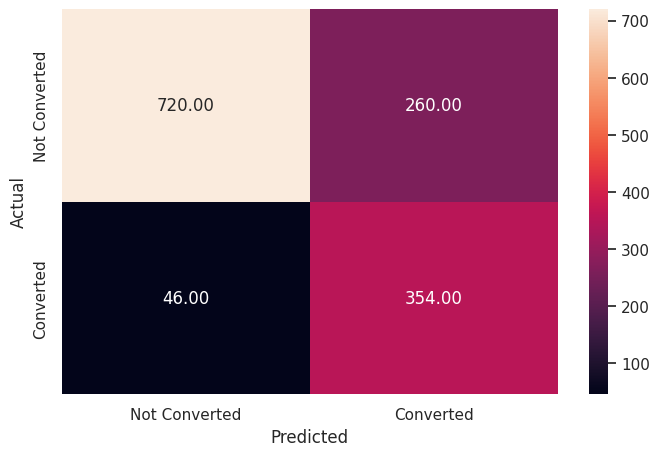

In [59]:
# Checking performance on the testing dataset
y_pred_test2 = d_tree_tuned.predict(X_test)
metrics_score(y_test, y_pred_test2)

**Observations:**
- The tuned moded has provided a generalised performance with balanced precision and recall values.

### **Visualizing the Decision Tree**

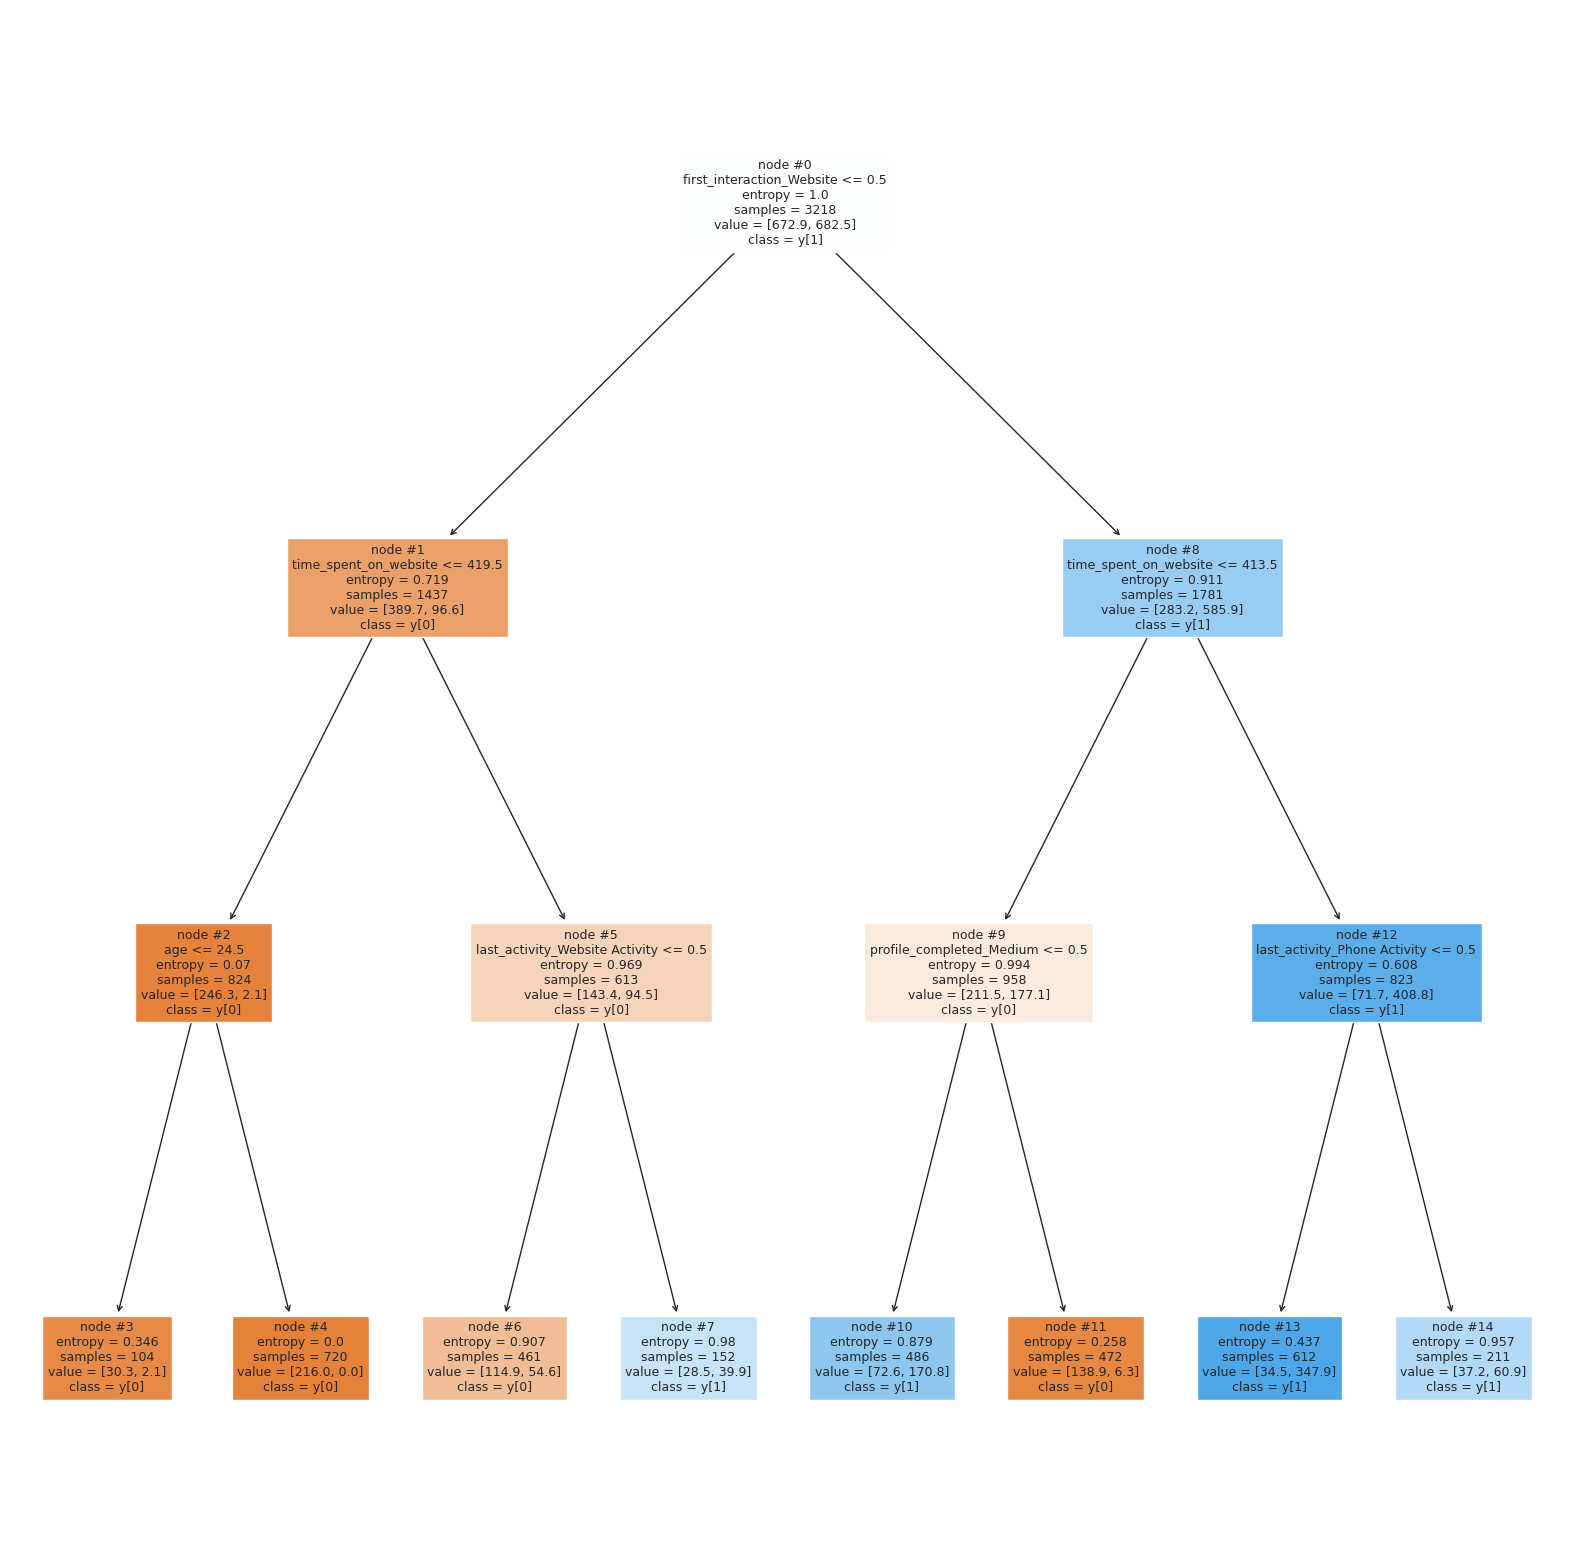

In [60]:
features = list(X.columns)

plt.figure(figsize = (20, 20))

tree.plot_tree(d_tree_tuned, feature_names = features, filled = True, fontsize = 9, node_ids = True, class_names = True)

plt.show()

In [61]:
# Importance of features in the tree building

print (pd.DataFrame(d_tree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                   Imp
time_spent_on_website          0.35131
first_interaction_Website      0.35057
profile_completed_Medium       0.22099
last_activity_Phone Activity   0.05070
last_activity_Website Activity 0.01619
age                            0.01024
website_visits                 0.00000
page_views_per_visit           0.00000
current_occupation_Student     0.00000
current_occupation_Unemployed  0.00000
profile_completed_Low          0.00000
print_media_type1_Yes          0.00000
print_media_type2_Yes          0.00000
digital_media_Yes              0.00000
educational_channels_Yes       0.00000
referral_Yes                   0.00000


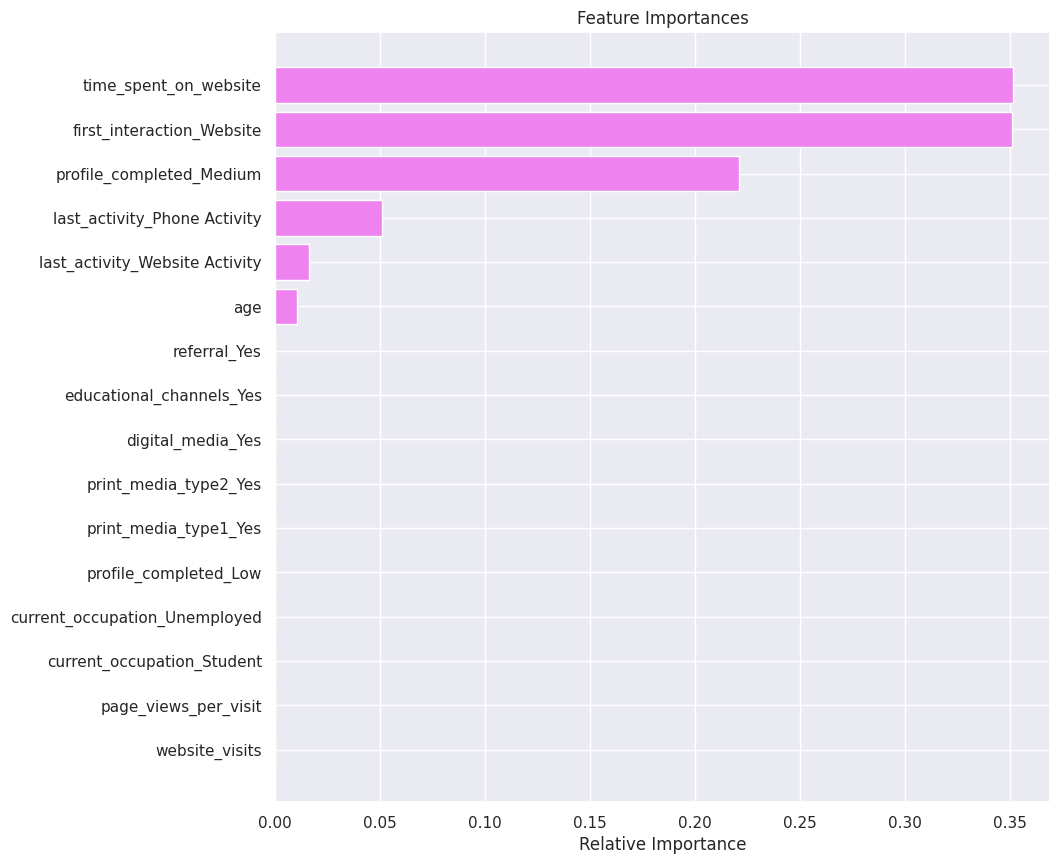

In [62]:
# Plotting the feature importance
importances = d_tree_tuned.feature_importances_

indices = np.argsort(importances)

plt.figure(figsize = (10, 10))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [features[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

**Observations:**
- We can appreciate how the tree has become simpler and its rules are now readable.
- We can also observe the most important features:
    - Time spent on website
    - First interaction website
    - Profile completed medium

## Random Forest model

### Building Random Forest Model

In [63]:
# Fitting the random forest tree classifier on the training dataset
rf_estimator = RandomForestClassifier(random_state = 1)

rf_estimator.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2243
           1       1.00      1.00      1.00       975

    accuracy                           1.00      3218
   macro avg       1.00      1.00      1.00      3218
weighted avg       1.00      1.00      1.00      3218



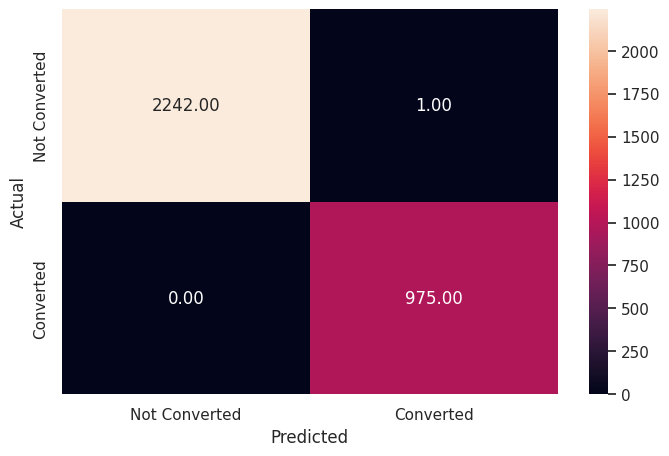

In [64]:
# Checking performance on the training dataset
y_pred_train3 = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train3)

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       980
           1       0.76      0.69      0.72       400

    accuracy                           0.85      1380
   macro avg       0.82      0.80      0.81      1380
weighted avg       0.84      0.85      0.84      1380



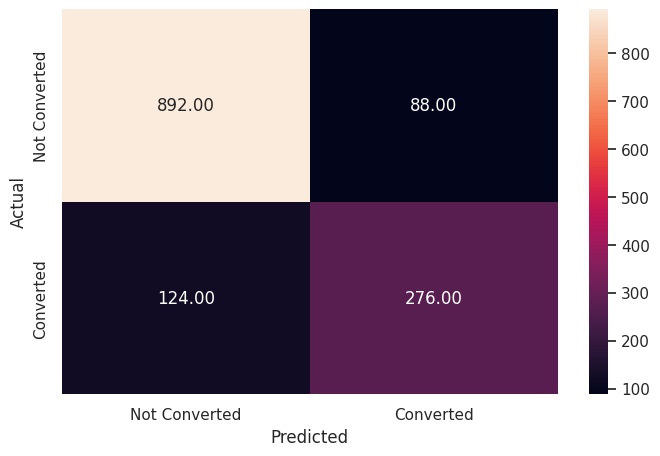

In [65]:
# Checking performance on the testing dataset
y_pred_test3 = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test3)

**Observations:**
- The Random Forest seems to be overfitting

### **Random Forest Model - Hyperparameter Tuning**

In [66]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 7)

# Grid of parameters to choose from
parameters = {"n_estimators": [110, 120],
    "max_depth": [6, 7],
    "min_samples_leaf": [20, 25],
    "max_features": [0.8, 0.9],
    "max_samples": [0.9, 1],
    "class_weight": ["balanced",{0: 0.3, 1: 0.7}]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search on the training data using scorer=scorer and cv=5
grid_obj = GridSearchCV(rf_estimator, parameters, cv=5, scoring=scorer,)

grid_obj = grid_obj.fit(X_train, y_train)

# Save the best estimator to variable rf_estimator_tuned
rf_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the training data
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, max_depth=6,
                       max_features=0.8, max_samples=0.9, min_samples_leaf=20,
                       n_estimators=110, random_state=1)

              precision    recall  f1-score   support

           0       0.94      0.84      0.89      2243
           1       0.71      0.88      0.78       975

    accuracy                           0.85      3218
   macro avg       0.82      0.86      0.84      3218
weighted avg       0.87      0.85      0.86      3218



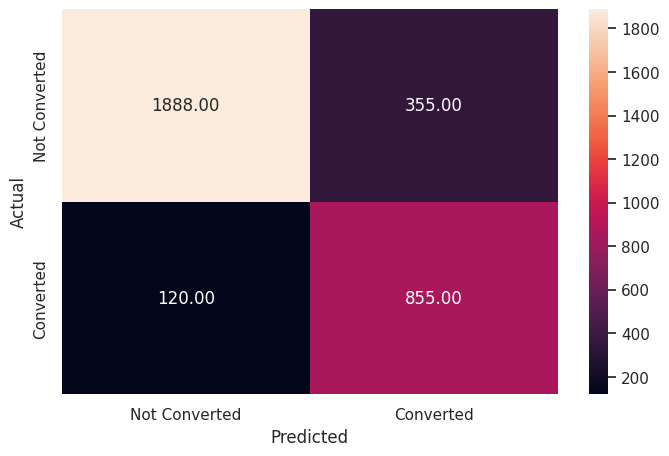

In [67]:
# Checking performance on the training data
y_pred_train4 = rf_estimator_tuned.predict(X_train)
metrics_score(y_train, y_pred_train4)

              precision    recall  f1-score   support

           0       0.92      0.82      0.87       980
           1       0.65      0.83      0.73       400

    accuracy                           0.82      1380
   macro avg       0.79      0.82      0.80      1380
weighted avg       0.84      0.82      0.83      1380



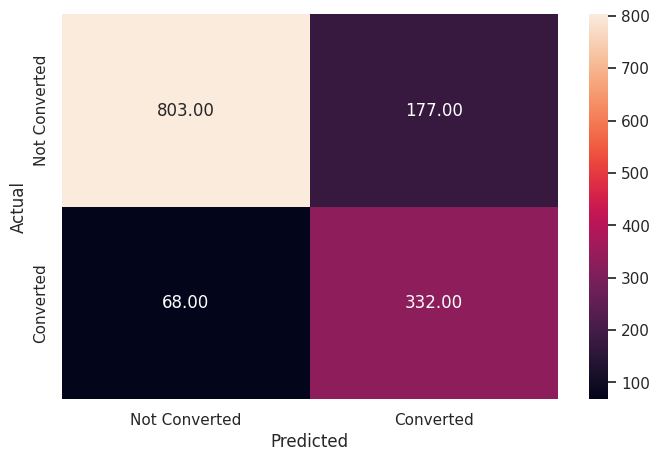

In [68]:
# Checking performance on the test data
y_pred_test4 = rf_estimator_tuned.predict(X_test)
metrics_score(y_test, y_pred_test4)

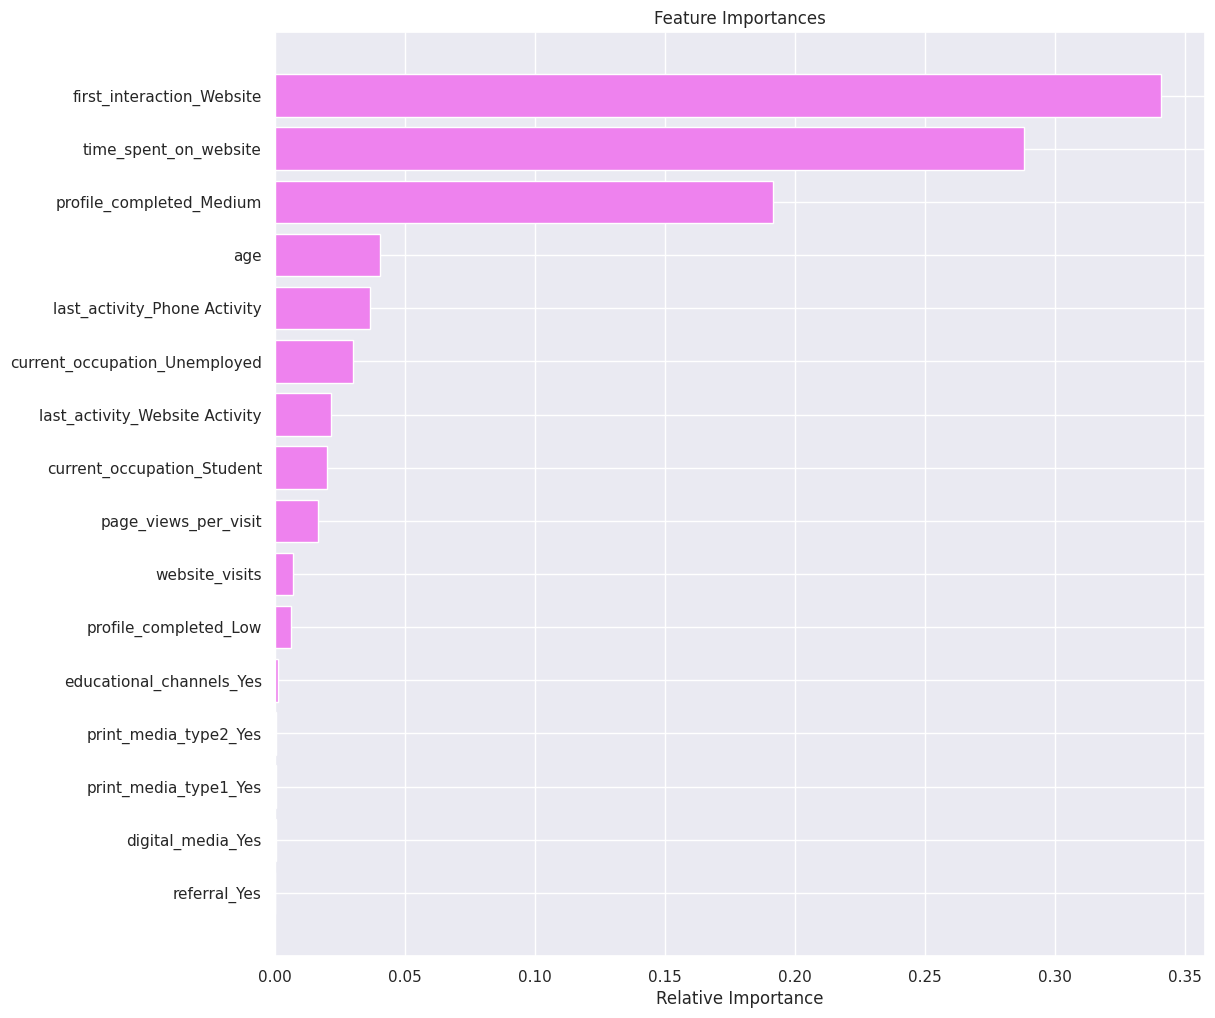

In [69]:
importances = rf_estimator_tuned.feature_importances_

indices = np.argsort(importances)

feature_names = list(X.columns)

plt.figure(figsize = (12, 12))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

**Observations:**
- The Random Forest Further verifies the results from the decision tree, in which the most important features are First interaction Website, Time spent on website, and profile completend medium.
- First Interaction-Website being the most important means that depending on the quality of the interaction the leads are most likely to convert to paid customers.
- Time spent on website is also a key feature, as the leads spend more time on the website the probability of them finding anything interesting increases which in tandem increases the probability of them becoming paid customers.

## **Business Insights and Recommendations**

- The Analysis shows that **First Interaction-Website** is one of the most important features for the company as it holds great importance for the conversion of the leads. Therefore, this is an area that requires resources and staff in order to maintain the quality and the conversion of leads.

- Between the 3 stages of Profile completion (**High-Medium-Low**) the (**High**) state is the one that produces the most conversions of leads. Therefore, it would be beneficial to add suggestions for the leads so that they could get motivated to increase their profile status **from medium completion to high completion.**

- When we analyze the data based on (**Age**) and (**Current Occupation**) we can observe that the majority of leads are **older than 40 years and are either Unemployed or Professional.** This is an area that could be improved in order to atract a more younger audience (**Students**) since they could also benefit from this service.

- We can observe that from the leads that were referred to the programs, albeit a small sample (**93**), Two thirds of them decided to convert into paid customers. Therefore, some resources could be alocated to this feature in order to motivate the leads to refer the program to other potential leads by offering benefits for both parties, the referring and the refererd lead.

- Finally, with the previous analysis of First Interaction and Last Activity we could observe that the leads are more inclined to convert depending on the **quality of the customer services and support given.** Therefore, this area of **"Customer Experience"** need be prioritized in order to both atract and mantain the leads.